In [13]:
from fastai.basics import *

In [14]:
n = 100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[-5:]

tensor([[-0.1518,  1.0000],
        [-0.6908,  1.0000],
        [-0.4484,  1.0000],
        [-0.0499,  1.0000],
        [-0.5086,  1.0000]])

In [15]:
a = tensor(3.,2); a

tensor([3., 2.])

In [16]:
y = x@a + 0.25*torch.randn(n)

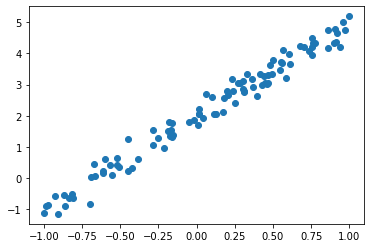

In [17]:
plt.scatter(x[:,0], y);

In [18]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [44]:
a = tensor(-1.,1)

In [20]:
y_hat = x@a
mse(y_hat, y)

tensor(6.7979)

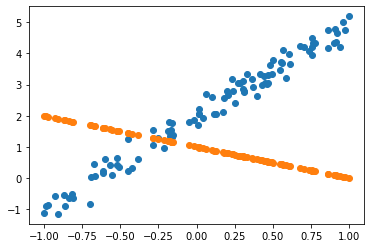

In [21]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [58]:
a = nn.Parameter(a); a,a.grad

(Parameter containing:
 tensor([  1.2318, -11.5477], requires_grad=True),
 None)

In [59]:
 def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        import pdb;pdb.set_trace()
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [60]:
lr = 1
a = tensor(-1.,1)
a = nn.Parameter(a)
for t in range(100): update()

tensor(6.7979, grad_fn=<MeanBackward0>)
> <ipython-input-59-c62dd7cd3d7a>(8)update()
      5    loss.backward()
      6    with torch.no_grad():
      7        import pdb;pdb.set_trace()
----> 8        a.sub_(lr * a.grad)
      9        a.grad.zero_()

ipdb> p a.grad
tensor([-2.7520, -2.6312])
ipdb> q


BdbQuit: 

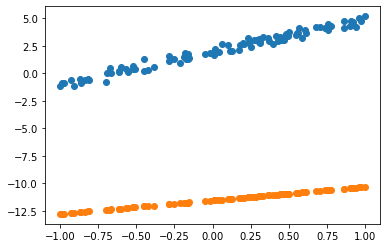

In [52]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

In [53]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [54]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [122]:
import torch 
a = torch.tensor([5.],requires_grad=True)

In [123]:
y = a**2

In [124]:
y

tensor([25.], grad_fn=<PowBackward0>)

In [125]:
external_grad = torch.tensor([1.])
y.backward(gradient=external_grad)

In [126]:
a.grad

tensor([10.])

In [127]:
lr = 1
with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [128]:
a

tensor([-5.], requires_grad=True)